# Quantum algorithms modelling with IBM Qiskit

## Prerequisites

In [1]:
!pip install qiskit qiskit-aer 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 9.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [3]:
from qiskit import QuantumCircuit, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector
from qiskit.providers.aer import Aer
from math import sqrt, pi
import numpy as np

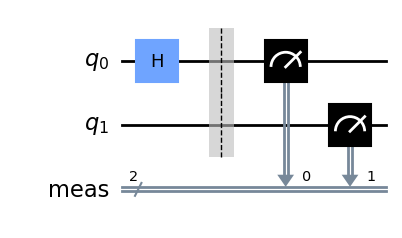

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.measure_all()
qc.draw(output='mpl')

/tmp/ipykernel_162/83082807.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result() # Do the simulation and return the resul


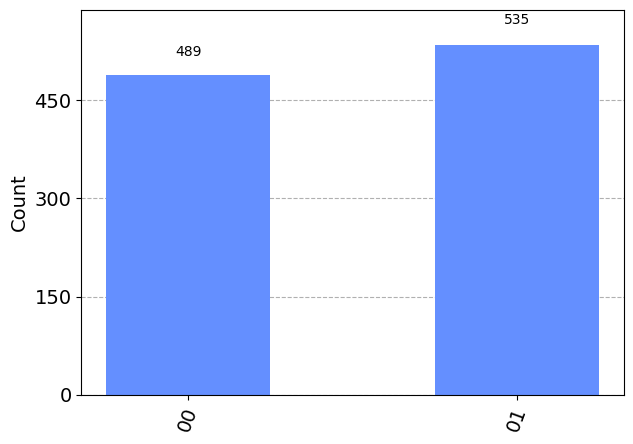

In [8]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the resul
counts = result.get_counts()
plot_histogram(counts)

## Quantum States

### Qubit
$$
\ket{\psi} = \alpha\ket{0}+\beta\ket{1}; \alpha,\beta \in \mathbb{C}
$$

$$
\ket{0} = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

and 

$$
\ket{1} = \begin{bmatrix}
0 \\
1
\end{bmatrix}
$$


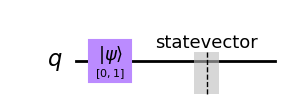

In [4]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 

In [5]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


/tmp/ipykernel_192/4069474290.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result() # Do the simulation and return the result


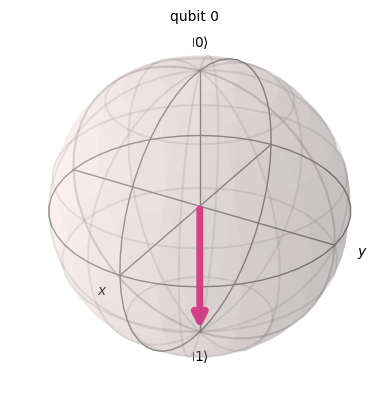

In [6]:
plot_bloch_multivector(out_state)

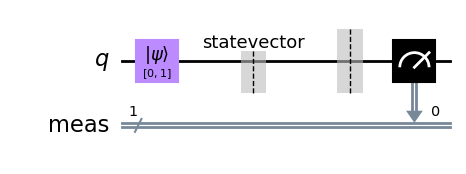

In [7]:
qc.measure_all()
qc.draw(output='mpl')

/tmp/ipykernel_192/2553066296.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


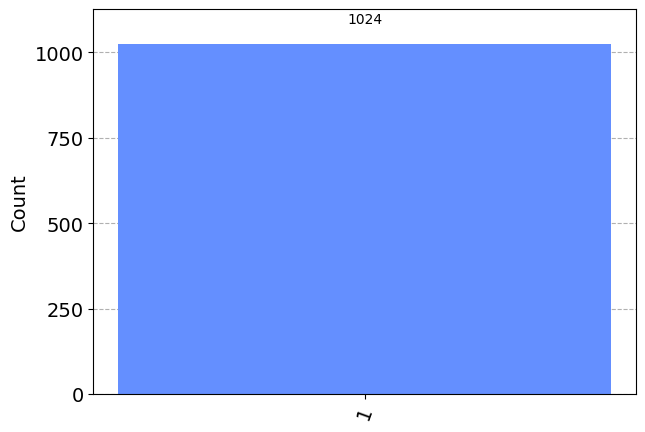

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Quantum Register

$$
\ket{\psi} = \sum_{i=0}^{2^n-1}\alpha_i\ket{i}, with \sum_{i=0}^{2^{n-1}}|\alpha_{i}|^2 = 1
$$

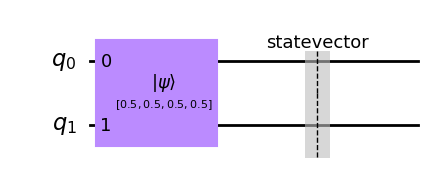

In [9]:
n = 2
qc = QuantumCircuit(n)  # Create a quantum circuit with one qubit
initial_state = [1/sqrt(2**n),1/sqrt(2**n), 1/sqrt(2**n), 1/sqrt(2**n)]
qc.initialize(initial_state,qc.qubits) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qc.draw(output='mpl') 


/tmp/ipykernel_192/3741341129.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result() # Do the simulation and return the result


Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


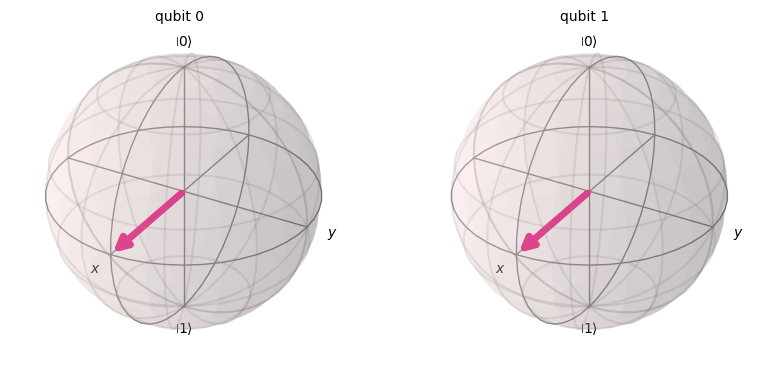

In [10]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_bloch_multivector(out_state)

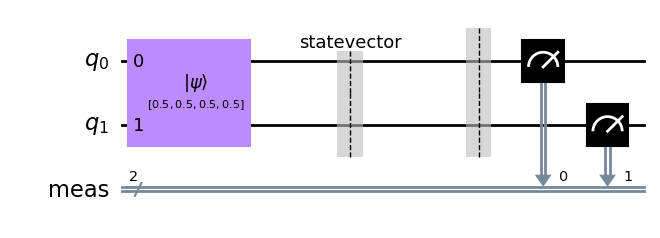

In [11]:
qc.measure_all()
qc.draw(output='mpl')

/tmp/ipykernel_192/2553066296.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


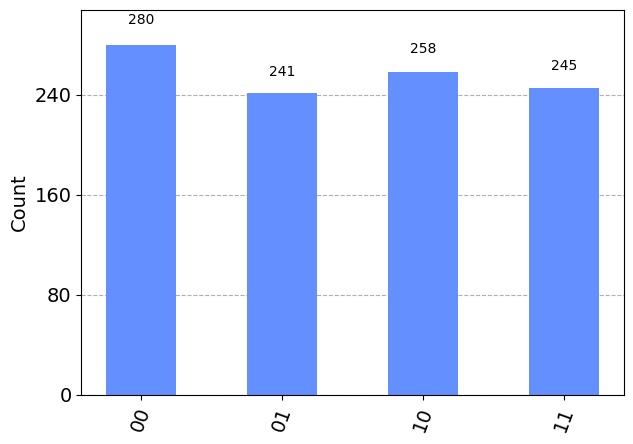

In [12]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Quantum Gates

### The Pauli Gates

#### The Pauli X Gate

$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix} = \ket{0}\bra{1} + \ket{1}\bra{0}
$$

#### The Pauli Y Gate

$$
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix} = -i\ket{0}\bra{1} + i\ket{1}\bra{0}
$$

#### The Pauli Z Gate

$$
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix} = \ket{0}\bra{0} - \ket{1}\bra{1}
$$

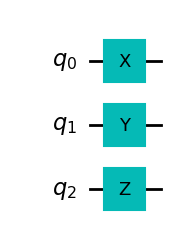

In [13]:
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw(output = "mpl")

/tmp/ipykernel_192/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


Statevector([ 0.-0.j,  0.-0.j,  0.+0.j,  0.+1.j,  0.+0.j,  0.+0.j, -0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


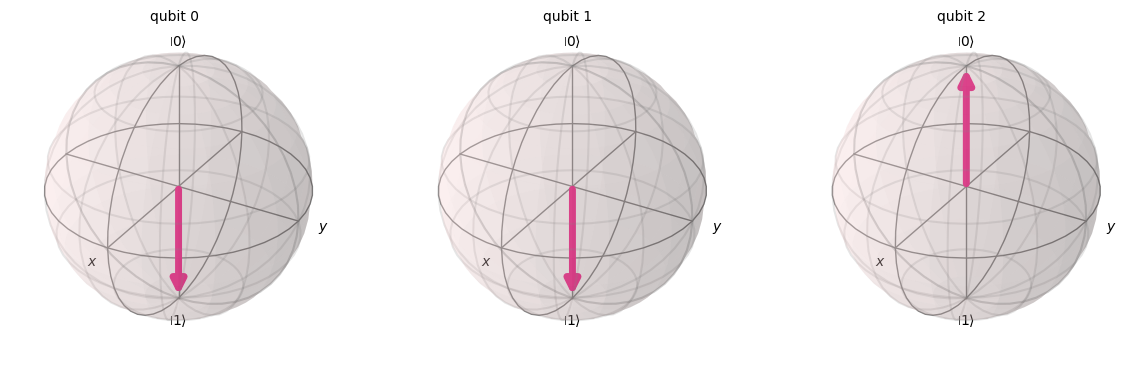

In [14]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

### The Hadamard Gate


$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$


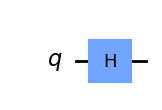

In [15]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output = "mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


/tmp/ipykernel_192/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


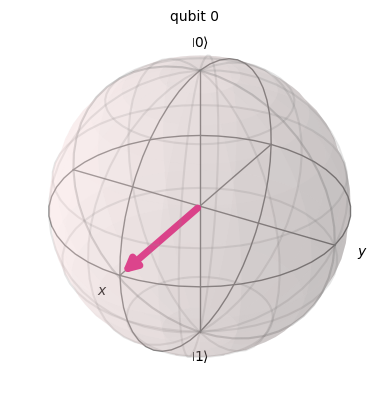

In [16]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

### The CNOT Gate


$$
CNOT = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$


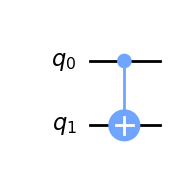

In [17]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw(output="mpl")

## Entanglement

$$
\ket{\rho} = \frac{1}{\sqrt{2}}\ket{01}+\frac{1}{\sqrt{2}}\ket{10}, \neg\exists \ket{x}, \ket{y} s.t. \ket{\rho}=\ket{x}\otimes\ket{y}
$$[Nielsen, M. A., & Chuang, I. L. (2010). Quantum computation and quantum information]

## Bell states

$$
\ket{\beta_{xy}} = \frac{\ket{0,y}+(-1)^x\ket{1,\overline{y}}}{\sqrt{2}}, 
$$
where $\overline{y}$ is the negation of *y*.

$$
\ket{\beta_{00}} = \frac{\ket{00}+\ket{11}}{\sqrt{2}} 
$$

$$
\ket{\beta_{01}} = \frac{\ket{01}+\ket{10}}{\sqrt{2}}
$$

$$
\ket{\beta_{10}} = \frac{\ket{00}-\ket{11}}{\sqrt{2}}
$$

$$
\ket{\beta_{11}} = \frac{\ket{01}-\ket{10}}{\sqrt{2}}
$$

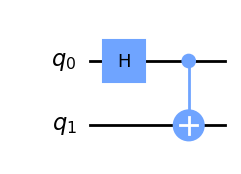

In [18]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.h(0)
qc.cx(0,1)
# See the circuit:
qc.draw(output="mpl")

/tmp/ipykernel_192/3074831140.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


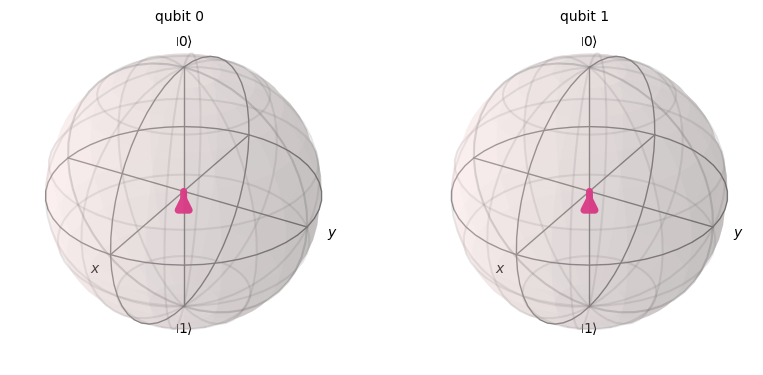

In [19]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)
plot_bloch_multivector(state)

## Quantum Algorithms

### 8-bits Quantum Ripple Carry Adder



In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

#### MAJ and UMA Gates [CUCCARO, Steven A., et al. A new quantum ripple-carry addition circuit. arXiv preprint quant-ph/0410184, 2004.]

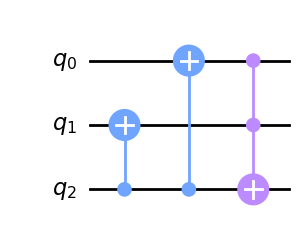

In [21]:
qc = QuantumCircuit(3)
qc.cx(2,1)
qc.cx(2,0)
qc.ccx(0, 1, 2)
qc.draw(output = "mpl")

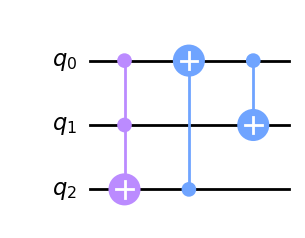

In [22]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.cx(2, 0)
qc.cx(0, 1)
qc.draw(output = "mpl")

In [23]:
def to_binary(value, number_of_bits, lsb=False):
    if lsb == True:
        return np.flip(np.array(list(np.binary_repr(value, number_of_bits)), dtype=int))
    return np.array(list(np.binary_repr(value, number_of_bits)), dtype=int)

In [1]:
def get_adder_instruction():
    def majority(circ,a,b,c):
        circ.cx(c,b)
        circ.cx(c,a)
        circ.ccx(a, b, c)
    def unmaj(circ,a,b,c):
        circ.ccx(a, b, c)
        circ.cx(c, a)
        circ.cx(a, b)
    def adder_4_qubits(p, a0, a1, a2, a3, b0, b1, b2, b3, cin, cout):
        majority(p, cin, b0, a0)
        majority(p, a0, b1, a1)
        majority(p, a1, b2, a2)
        majority(p, a2, b3, a3)
        p.cx(a3, cout)
        unmaj(p, a2, b3, a3)
        unmaj(p, a1, b2, a2)
        unmaj(p, a0, b1, a1)
        unmaj(p, cin, b0, a0)
    a = QuantumRegister(8, "aop")
    b = QuantumRegister(8, "bop")
    c = QuantumRegister(2, "carry")

    add_circ = QuantumCircuit(a, b, c,name="Add")
    adder_4_qubits(add_circ, a[0], a[1], a[2], a[3], b[0], b[1], b[2], b[3], c[0], c[1])
    adder_4_qubits(add_circ, a[4], a[5], a[6], a[7], b[4], b[5], b[6], b[7], c[1], c[0])
    add8 = add_circ.to_instruction()
    add_circ.draw()
    return add8

In [25]:
n_bits = 8
a_reg = QuantumRegister(n_bits,"aqreg")
b_reg = QuantumRegister(n_bits,"bqreg")
carry= QuantumRegister(2,"carry")
cc = ClassicalRegister(n_bits,"cc")
qc = QuantumCircuit(a_reg,b_reg,carry,cc)

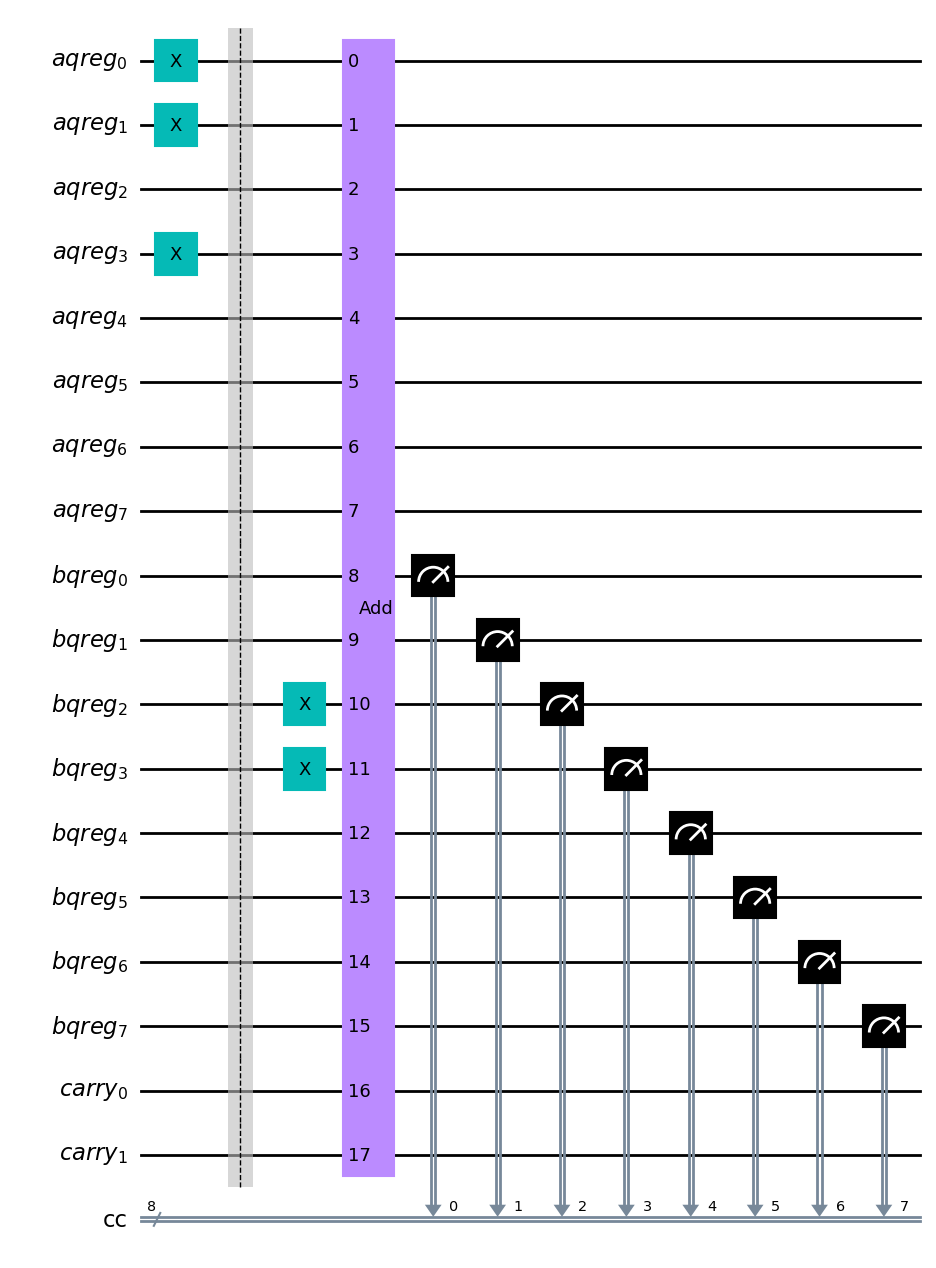

In [26]:
val_a_dec = 11
val_b_dec = 12
adder_instr = get_adder_instruction()

val_a_bin=to_binary(val_a_dec,n_bits,True)
val_b_bin=to_binary(val_b_dec,n_bits,True)
for i in range(0,n_bits):
    if val_a_bin[i]==1:
        qc.x(a_reg[i])
qc.barrier()
for i in range(0,n_bits):
    if val_b_bin[i]==1:
        qc.x(b_reg[i])
qc.append(adder_instr,[q for q in range(0,18)])
qc.measure(b_reg,cc)
qc.draw(output="mpl")

In [27]:
a = to_binary(1,8)
b = to_binary(12,8)
c = to_binary((11 + 12),8)
print("{0}\t{1}\t{2}".format(a,b,c))

[0 0 0 0 0 0 0 1]	[0 0 0 0 1 1 0 0]	[0 0 0 1 0 1 1 1]


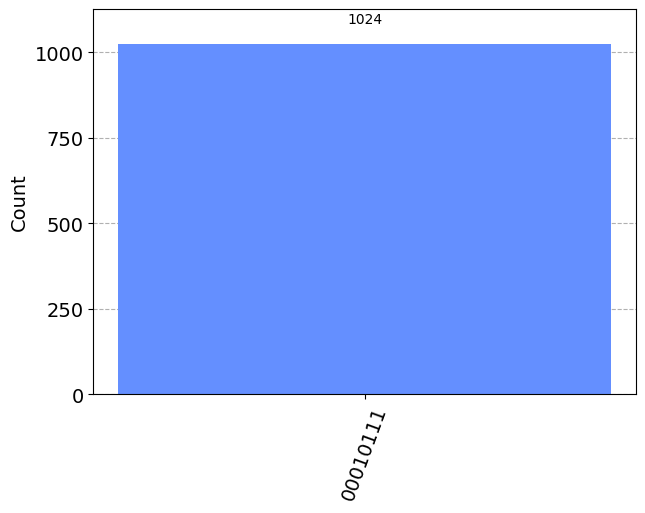

In [28]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_adder_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_adder_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

### Grover's algorithm

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [30]:
qc = QuantumCircuit(3)
qc.h(2)
#qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
#qc.x(0)
qc.x(1)
qc.h(2)
oracle = qc.to_gate()
oracle.name = "U$_\omega$"

In [31]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits-1):
        qc.h(qubit)
    
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)  # multi-controlled-toffoli
    qc.h(nqubits-2)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits-1):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    qc.draw(output="mpl")
    return U_s

In [32]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

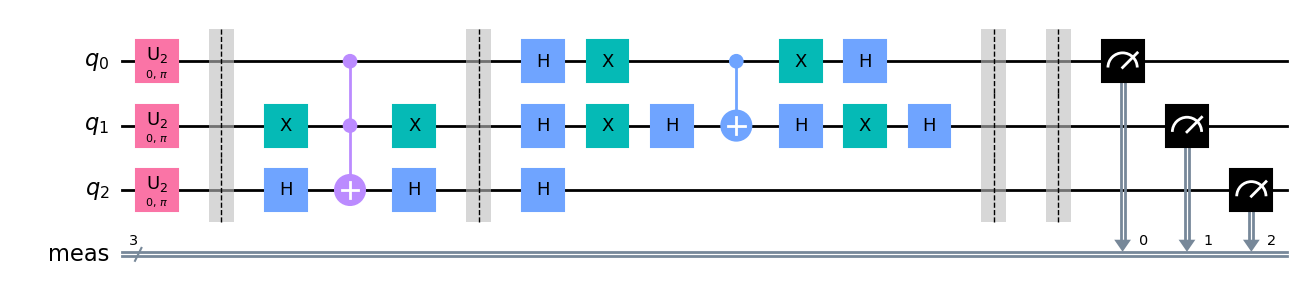

In [33]:
n = 3
qc = QuantumCircuit(n)
qc = initialize_s(qc,[i for i in range(0,n)])
qc.barrier()
qc.append(oracle, [0,1,2])
qc.barrier()
qc.append(diffuser(n), [0,1,2])
qc.barrier()
qc.measure_all()
decomposed_circ = qc.decompose() # Does not modify original circuit
decomposed_circ.draw(output="mpl")



In [34]:
sv_sim = Aer.get_backend('statevector_simulator')
transpiled_grover_circuit = transpile(qc, sv_sim)
result = sv_sim.run(transpiled_grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

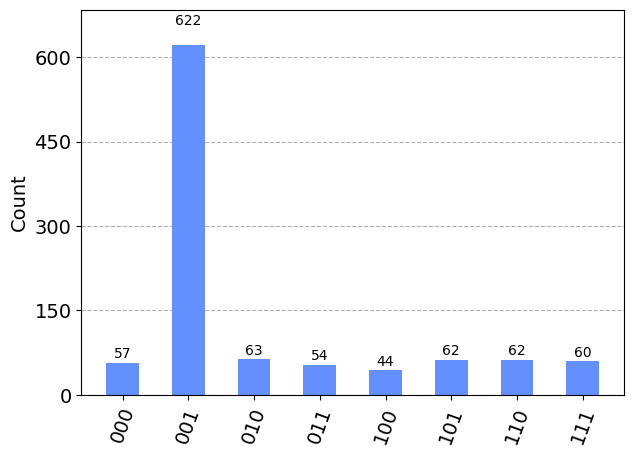

In [35]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

### Quantum Key Distribution

The protocol makes use of the fact that measuring a qubit can change its state. 
If Alice sends Bob a qubit, and an eavesdropper (Eve) tries to measure it before Bob does, there is a chance that Eve’s measurement will change the state of the qubit and Bob will not receive the qubit state Alice sent.

In [36]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
np.random.seed(seed=0)

In [37]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i]==0:
                pass
            else:
                qc.x(0)
        else:
            if bits[i]==0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, bases):
    backend = Aer.get_backend("aer_simulator")
    measurements = []
    for q in range(n):
        if bases[q] == 0: 
            message[q].measure(0,0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0)
        result = backend.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def throw_qubits(a_bases, b_bases, bits):
    key = []
    for b in range(n):
        if a_bases[b]==b_bases[b]:
            key.append(bits[b])
    return key

def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

#### Step 1

Alice chooses a string of random bits and a random choice of basis for each bit

In [38]:
n = 100
alice_bits = np.random.randint(2, size=n)
alice_bases = np.random.randint(2, size=n)
print(f'Message: {alice_bits}\nBases{alice_bases}')


Message: [0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]
Bases[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


#### Step 2

Alice then encodes each bit onto a string of qubits using the basis she chose. Each qubit will be in one of the states $\ket{0}$, $\ket{1}$, $\ket{+}$, and $\ket{-}$. This is the message she sends to Bob.

In [39]:
message = encode_message(alice_bits, alice_bases)
print("bit = %i" % alice_bits[0])
print("bit = %i" % alice_bases[0])

bit = 0
bit = 1


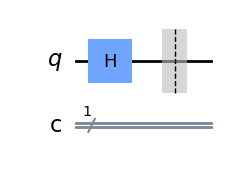

In [40]:
message[0].draw(output="mpl")

[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]


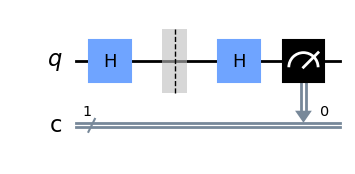

In [41]:
## Interception
eve_bases = np.random.randint(2, size=n)
intercepted_message=measure_message(message, eve_bases)
print(intercepted_message)
message[0].draw(output = "mpl")

#### Step 3

Bob then measures each qubit at random and keeps the results private.

In [42]:
bob_bases = np.random.randint(2, size=n)
print(f"Bob bases {bob_bases}")
bob_results = measure_message(message, bob_bases)

Bob bases [1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1]


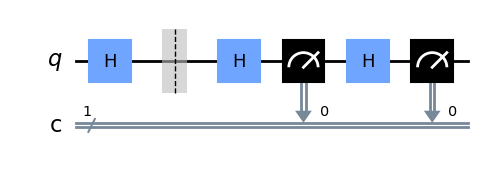

In [43]:
message[0].draw(output = "mpl")

In [44]:
print(bob_results)

[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


#### Step 4

Bob and Alice then publicly share which basis they used for each qubit. If Bob measured a qubit in the same basis Alice prepared it in, they use this to form part of their shared secret key, otherwise they discard the information for that bit.

In [45]:
alice_key = throw_qubits(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [46]:
bob_key = throw_qubits(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


#### Step 5

Finally, Bob and Alice share a random sample of their keys, and if the samples match, they can be sure (to a small margin of error) that their transmission is successful.



In [47]:
sample_size = 10
bit_selection = np.random.randint(n, size=sample_size)

In [48]:
bob_sample = sample_bits(bob_key, bit_selection)
print(bob_sample)

[1, 0, 1, 1, 0, 0, 1, 1, 0, 1]


In [49]:
alice_sample = sample_bits(alice_key, bit_selection)
print(alice_sample)

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1]


In [50]:
bob_sample == alice_sample

False